# Test Plant #

Mostly to make sure everything is connected

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

## 1 bed - no nitrogen ##

In [5]:
a = Aquaponics('plant', server='http://xps.apmonitor.com', kswitch=100)
m = a.get_model()

tf = 45
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 7

for var in m.variables:
    if hasattr(var, 'FSTATUS'):
        var.FSTATUS = 1
    var.value.change = False

# a.solve(glamdring=False, disp=False)
# m.server = 
m.options.CSV_READ = 1
m.solve(disp=False)

Text(0.5,0,'Time (days)')

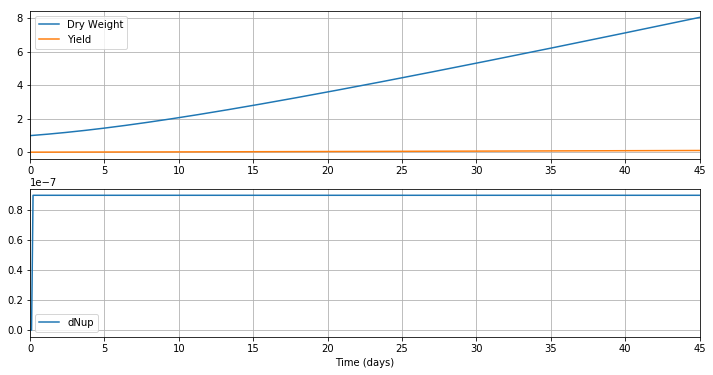

In [6]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Test 1 Bed - Nitrogen ##

In [ ]:
a = Aquaponics('plant', server='http://xps.apmonitor.com', N0=.1, kswitch=100)
m = a.get_model()

tf = 90
steps = tf * 12 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 7
# m.options.MAX_ITER = 1000

# a.solve(glamdring=False)
m.solve()

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')

In [ ]:
# print(m.wS.value[0:10])
# print('---')
# print(m.dWS.value[0:10])
# print('---')
# print(m.wG.value[0:10])
# print('---')
# print(m.dWG.value[0:10])
# print('---')
# print(m.w.value[0:10])
# print('---')
# print(a.dNup.value[0:10])

In [ ]:
# for var in m.variables:
#     var.value.change = True
# for par in m.parameters:
#     par.value.change = True

In [ ]:
# class A:
    
#     __private_var = 1
    
#     def __private(self):
#         print('reached')
        
#     def public(self):
#         print(self.__private_var)
#         print(self.__private())
        
# a = A()
# print(a.public())
# a.__private()

In [ ]:
# print(a.__private_var)